# Logistic distribution simulation

In [1]:
library(evd)
library(maxstablePCA)
library(ggplot2)
library(dplyr)
library(GGally)
library(graphicalExtremes)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
set.seed(12)
s <- 200

In [3]:
Z <- rmvevd(10000, dep = .5, model = "log", d = 2, mar = c(1,1,1))

In [4]:
Z2 <- rmstable(10000, d = 2, par = matrix(c(0, .6, .6, 0), 2, 2))

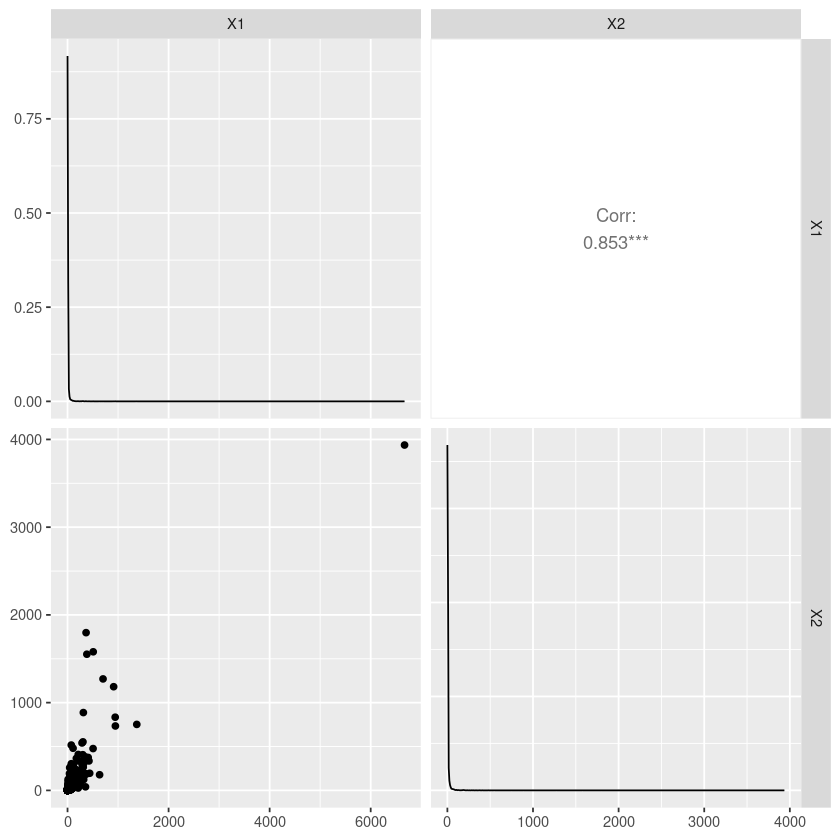

In [5]:
ggpairs(data.frame(Z2))

In [6]:
? rmvevd

In [7]:
A <- matrix(c(0.8, 0.6, 0.05, 0.45, 0.2, 0.4, 0.95, 0.55), 4, 2)
X <- t(maxmatmul(A, t(Z)))
X2 <- t(maxmatmul(A, t(Z2)))

In [8]:
A

0.80,0.20
0.60,0.40
0.05,0.95
0.45,0.55


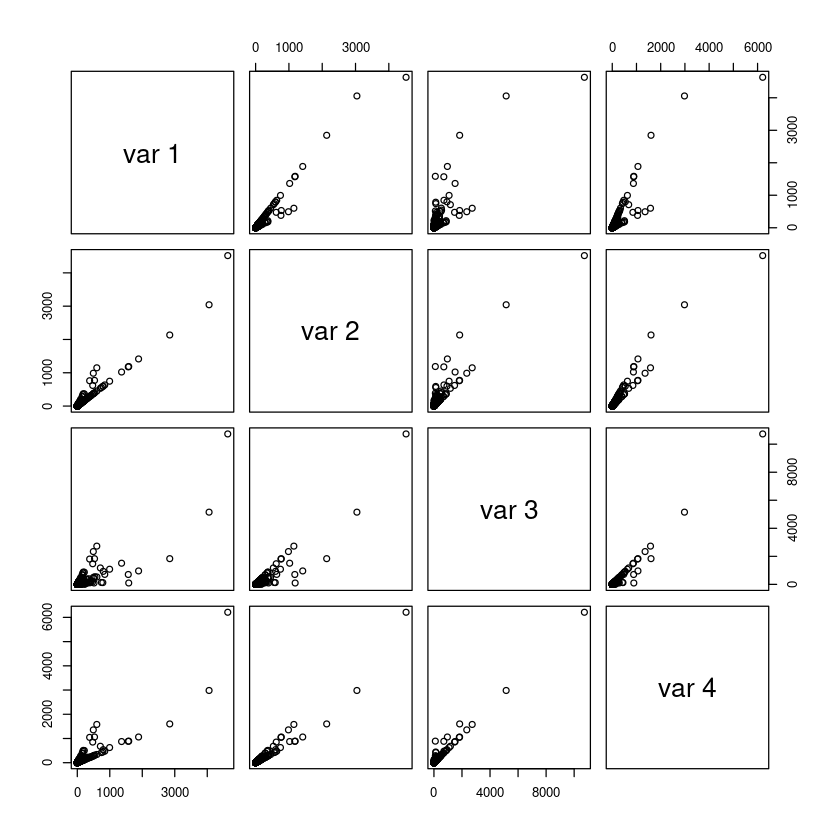

In [9]:
pairs(X)

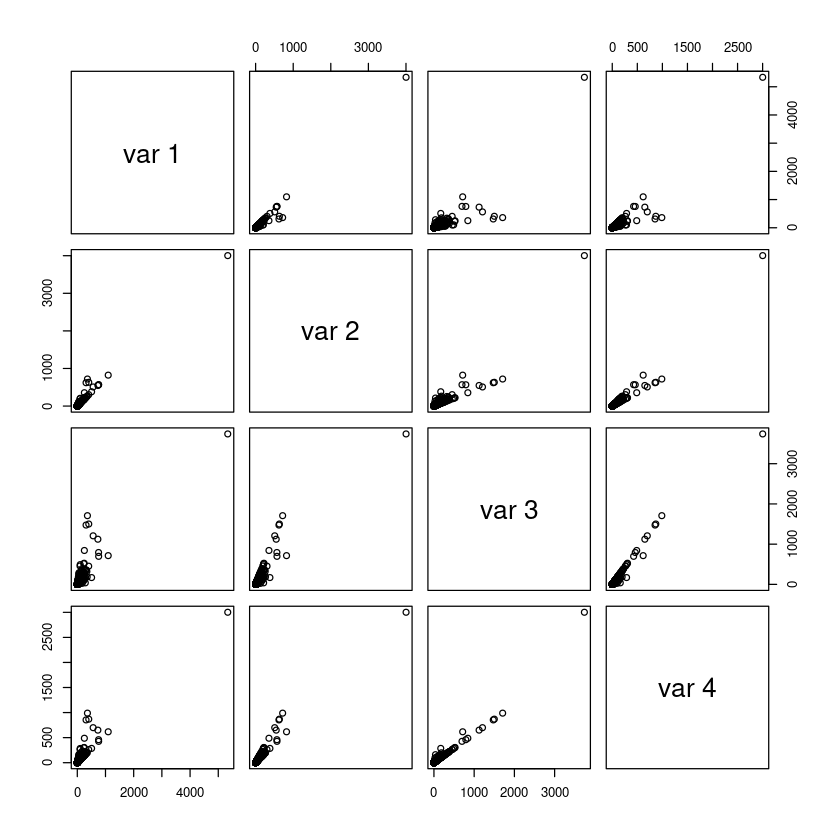

In [10]:
pairs(X2)

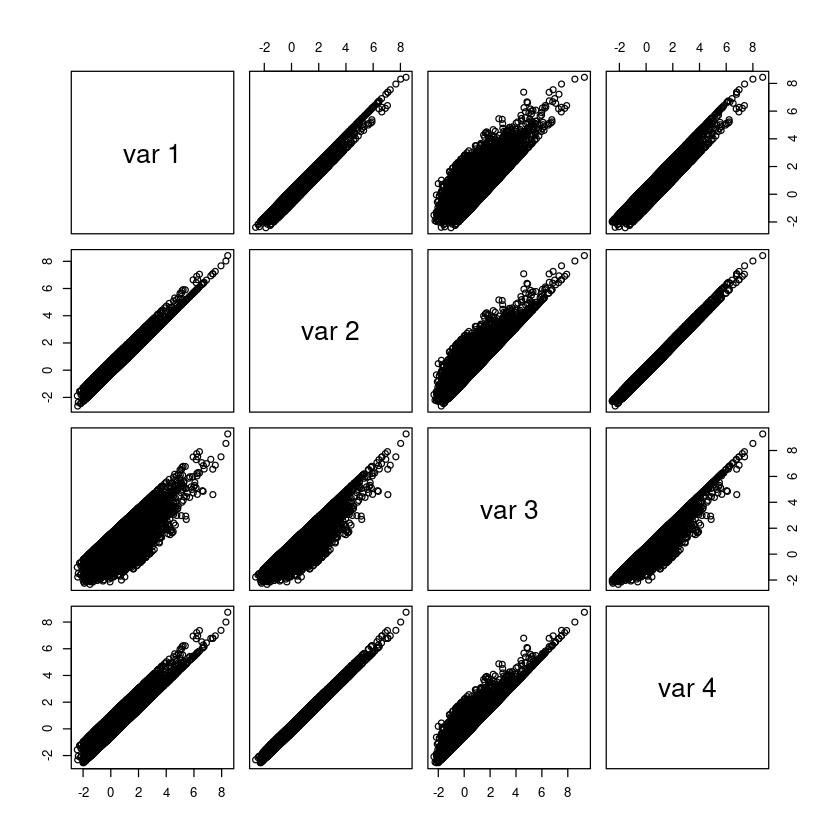

In [11]:
pairs(log(X))

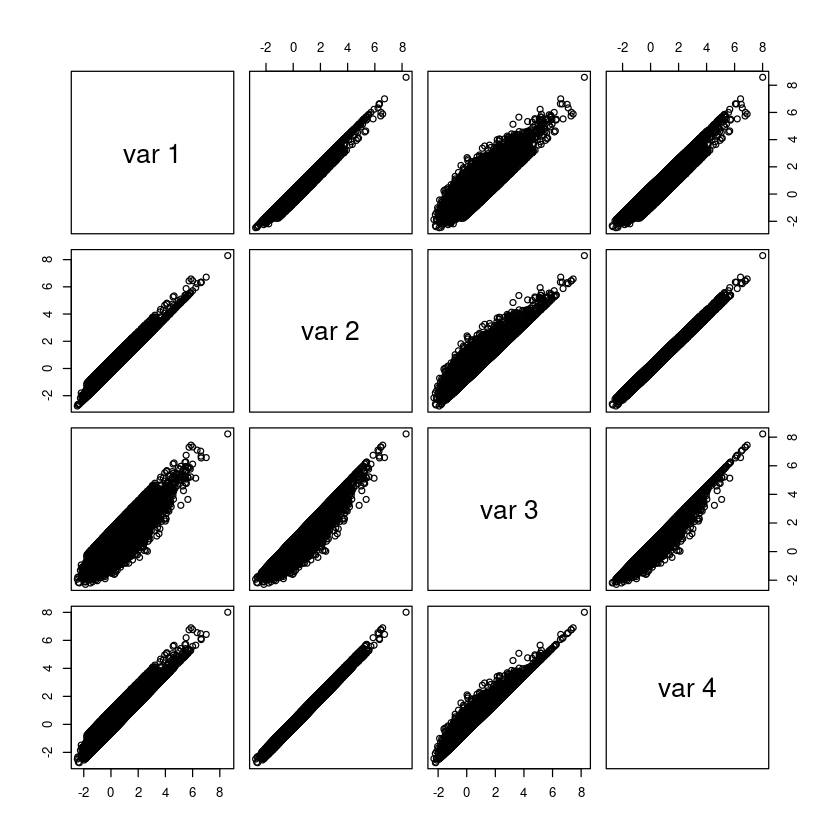

In [12]:
pairs(log(X2))

In [13]:
Xtrafo <- transform_unitpareto(X)

# max-stable PCA for X

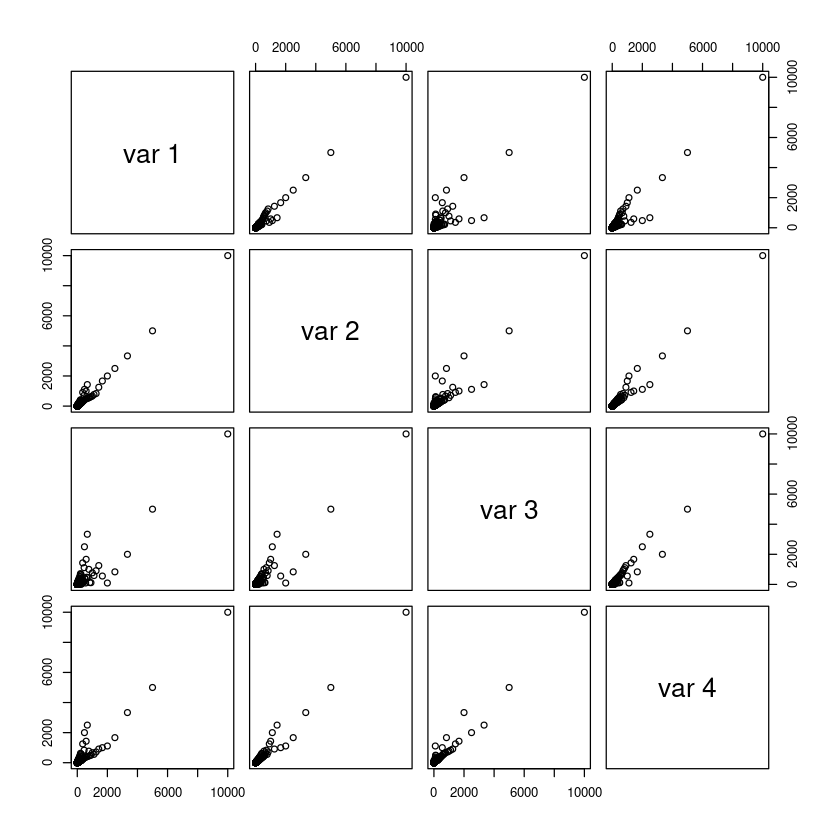

In [14]:
pairs(Xtrafo)

In [15]:
summary(rowSums(Xtrafo))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    4.00     5.55     8.24    39.15    16.33 40000.00 

In [16]:
length(which(rowSums(Xtrafo) > s))

[1] 197

In [17]:
maxPCA1 <- max_stable_prcomp(Xtrafo, p = 1, s = s, n_initial_guesses = 2000)
maxPCA2 <- max_stable_prcomp(Xtrafo, p = 2, s = s, n_initial_guesses = 2000)
maxPCA3 <- max_stable_prcomp(Xtrafo, p = 3, s = s, n_initial_guesses = 2000)
maxPCA4 <- max_stable_prcomp(Xtrafo, p = 4, s = s, n_initial_guesses = 2000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [18]:
maxPCA2

$p
[1] 2

$d
[1] 4

$decoder_matrix
           [,1]       [,2]
[1,] 1.13154538 0.05074192
[2,] 0.98178995 0.67682987
[3,] 0.04020879 1.11749227
[4,] 0.75147993 0.91850725

$encoder_matrix
           [,1]       [,2]      [,3]       [,4]
[1,] 0.88374459 0.19469776 0.1463760 0.15618665
[2,] 0.01815466 0.01741979 0.8948626 0.06698559

$reconstr_matrix
          [,1]       [,2]      [,3]       [,4]
[1,] 0.9999971 0.22030936 0.1656311 0.17673228
[2,] 0.8676516 0.19115231 0.6056698 0.15334248
[3,] 0.0355343 0.01946648 1.0000021 0.07485588
[4,] 0.6641163 0.14631146 0.8219378 0.11737113

$loss_fctn_value
[1] 0.07637432

$optim_conv_status
[1] 4

$s
[1] 200

$starting_vals
$starting_vals$encoder_matrix_x0
          [,1]      [,2]
[1,] 1.0000000 0.9173041
[2,] 0.8544839 0.8503010
[3,] 0.8211382 1.0000000
[4,] 0.6584094 0.8683060

$starting_vals$decoder_matrix_xo
          [,1]      [,2]
[1,] 0.9918249 0.2566578
[2,] 0.5947051 0.9228934
[3,] 0.5845967 0.1561866
[4,] 0.5596286 0.9364620


attr(,"cl

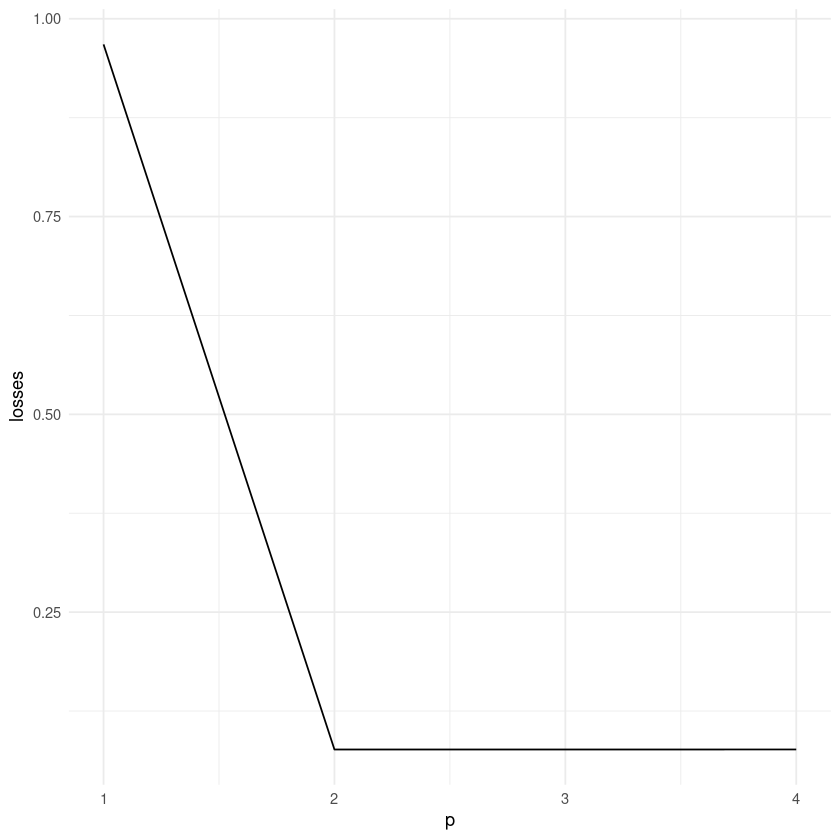

In [19]:
plotdat <- data.frame(p = 1:4, losses = c(
    maxPCA1$loss_fctn_value,
    maxPCA2$loss_fctn_value,
    maxPCA3$loss_fctn_value,
    maxPCA4$loss_fctn_value   
))

pe <- ggplot(aes(x = p, y = losses), data = plotdat) + geom_line() + theme_minimal()
pe

In [20]:
ggsave("genmlm_elbow.png", pe)

Saving 6.67 x 6.67 in image


In [21]:
rec <- t(maxmatmul(maxPCA2$reconstr_matrix, t(X)))

In [22]:
datX <- data.frame(X)
datX$is_rec = "original"
datrec <- data.frame(rec)
datrec$is_rec = "reconstruction"
names(datrec) <- names(datX)
plot_datX <- full_join(datX, datrec)

Joining with `by = join_by(X1, X2, X3, X4, is_rec)`


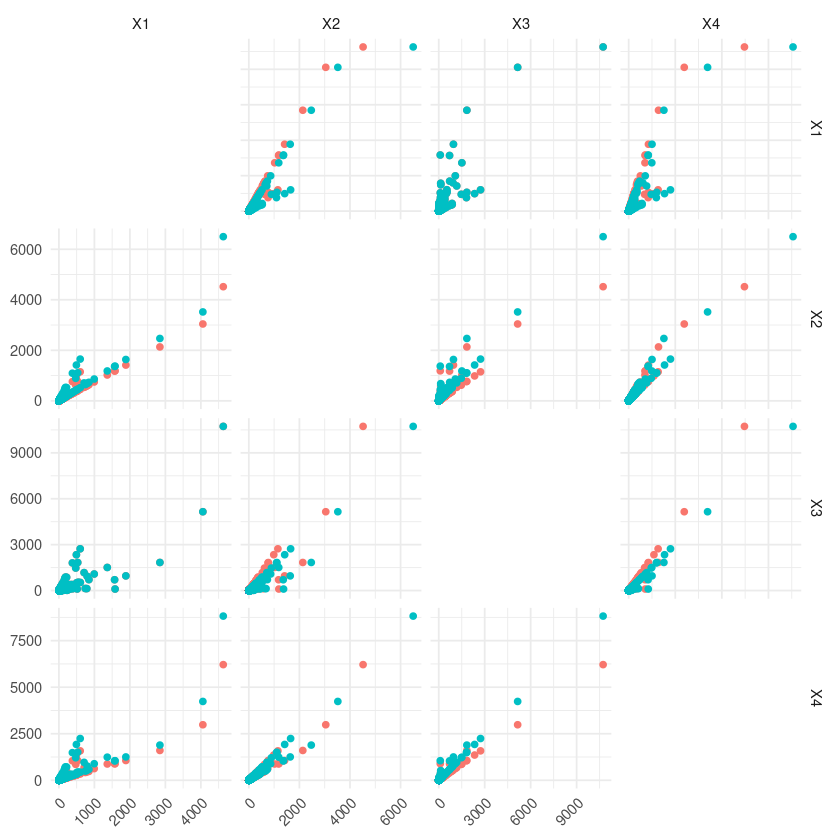

In [23]:
p <- ggpairs(
    plot_datX, 
    aes(color = is_rec),
    columns = 1:4,
    upper = list(continuous = "points", combo = "dot_no_facet"),
    diag = list(continuous = "blankDiag", discrete = "barDiag", na = "naDiag")
) + 
theme_minimal() +
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

p

In [24]:
plot_datX %>% group_by(is_rec) %>% summarize(max(X1))

is_rec,max(X1)
<chr>,<dbl>
original,4630.667
reconstruction,4630.654


In [25]:
ggsave("genmlm.png", p)

Saving 6.67 x 6.67 in image
